In [78]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [79]:
# Load CSV file into the df
crypto_df = pd.read_csv('resource/crypto_data.csv')
crypto_df.set_index('Unnamed: 0', inplace=True)
crypto_df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
Unnamed: 0,,,,,,
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000


In [80]:
# Filter for currencies that are currently being traded
crypto_df = crypto_df[crypto_df['IsTrading'] == True]
crypto_df.head(10)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
Unnamed: 0,,,,,,
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0


In [81]:
# Drop the IsTrading column from the dataframe
crypto_df = crypto_df.drop(columns='IsTrading')
crypto_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
Unnamed: 0,,,,,
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...
SERO,Super Zero,Ethash,PoW,NaN,1000000000
UOS,UOS,SHA-256,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610


In [82]:
# Remove all rows that have at least one null value
crypto_df.dropna(inplace=True)
crypto_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
Unnamed: 0,,,,,
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610


In [83]:
# Filter for cryptocurrencies that have been mined. That is, the total coins mined should be greater than zero.
crypto_df = crypto_df[crypto_df["TotalCoinsMined"]> 0]
crypto_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
Unnamed: 0,,,,,
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610


In [84]:
#index names
crypto_df.index.names = ['']
crypto_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
,,,,,
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610


In [85]:
#information
crypto_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 532 entries, 42 to XBC
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CoinName         532 non-null    object 
 1   Algorithm        532 non-null    object 
 2   ProofType        532 non-null    object 
 3   TotalCoinsMined  532 non-null    float64
 4   TotalCoinSupply  532 non-null    object 
dtypes: float64(1), object(4)
memory usage: 24.9+ KB


In [86]:
# To be comprehensible to a machine learning algorithm, its data should be numeric.  
# IF no coins remove from dataset
crypto_df = crypto_df.drop(columns='CoinName', axis=1)
crypto_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
,,,,
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,CryptoNight,PoW,9.802226e+08,1400222610


In [87]:
# Nunique
crypto_df['ProofType'].nunique()

25

In [88]:
# Convert the remaining features with text values, Algorithm and ProofType, into numerical data. 
X = pd.get_dummies(crypto_df, columns=['Algorithm', 'ProofType'])
X.head(10)

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
,,,,,,,,,,,,,,,,,,,,,
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LTC,6.303924e+07,84000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DASH,9.031294e+06,22000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
XMR,1.720114e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETC,1.133597e+08,210000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
# Standardize your dataset so that columns that contain larger values do not unduly influence the outcome
X_scaled = StandardScaler().fit_transform(X[['TotalCoinsMined','TotalCoinSupply']])
X_scaled

array([[-0.11710817, -0.1528703 ],
       [-0.09396955, -0.145009  ],
       [ 0.52494561,  4.48942416],
       ...,
       [-0.09561336, -0.13217937],
       [-0.11694817, -0.15255998],
       [-0.11710536, -0.15285552]])

In [90]:
# Scale
X_scaled_df=X.copy()
X_scaled_df['TotalCoinsMined']=X_scaled[:,0]
X_scaled_df['TotalCoinSupply']=X_scaled[:,1]

# Dimensionality Reduction


In [91]:
# Perform dimensionality reduction with PCA.
# Preserve 90% of the explained variance in dimensionality reduction. 
# Get two principal components for the data.
pca = PCA(n_components=0.90)
crypto_pca  = pca.fit_transform(X_scaled_df)

In [92]:
crypto_pca.shape

(532, 12)

In [93]:
pca.explained_variance_ratio_.sum()

0.90488890007667

In [94]:
# PCA Data loaded into dataframe
crypto_pcs_df = pd.DataFrame(
    data=crypto_pca, index=X.index
)
crypto_pcs_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
,,,,,,,,,,,,
42,-0.209276,-0.801765,0.172975,-0.672385,-0.028027,-0.027350,0.002161,-0.016859,-0.047423,-0.023043,-0.007850,0.015789
404,-0.187390,-0.804259,0.162555,-0.673029,-0.028782,-0.027213,0.002265,-0.017852,-0.047565,-0.023081,-0.007752,0.015888
1337,3.529674,-0.305537,2.915403,0.414815,-0.163323,-0.259278,-0.278472,-0.152434,0.747395,0.360814,-0.233801,-0.070220
BTC,-0.180157,0.694290,-0.165771,0.239931,-0.278380,-0.614707,0.624124,-0.015063,0.027769,0.009259,-0.026164,-0.026461
ETH,-0.173289,0.688569,-0.154390,0.131918,-0.212548,-0.104388,-0.242103,0.002800,0.113068,-0.125626,0.058157,-0.129333


In [95]:
# Initialize t-SNE model 
tsne = TSNE(learning_rate=35)

In [96]:
# Reduce the dataset dimensions with t-SNE and visually inspect the results
tsne_features = tsne.fit_transform(crypto_pcs_df)

In [97]:
# PCA Transformation, reduced to two run t - SNE on principal components
transformed_features  = tsne.fit_transform(pca_transformed_data)
transformed_features

array([[  5.4559298,  24.166979 ],
       [  0.9549141,  20.912512 ],
       [  6.897574 ,  -2.8696394],
       ...,
       [  4.8839273,  -8.71732  ],
       [ -7.755559 , -12.152435 ],
       [ -5.178391 ,  12.303632 ]], dtype=float32)

In [98]:
transformed_features.shape

(532, 2)

In [99]:
# Plot the dataset

# The first column of transformed features
crypto_pcs_df['x'] = tsne_features[:,0]

# The second column of transformed features
crypto_pcs_df['y'] = tsne_features[:,1]

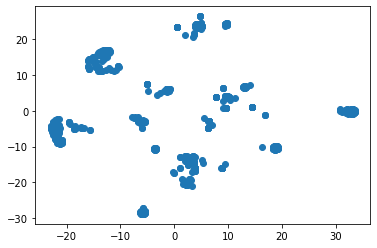

In [100]:
# Cluster
plt.scatter(crypto_pcs_df['x'], crypto_pcs_df['y'])
plt.show()

In [127]:
# Initializing model with K = 3 
# Identify best number of clusters using elbow curve
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(pca_transformed_data)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

C:\Users\greyh\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  f"KMeans is known to have a memory leak on Windows "


,k,inertia
0,1,1691.965348
1,2,1007.765071
2,3,794.753156
3,4,602.031812
4,5,489.084850


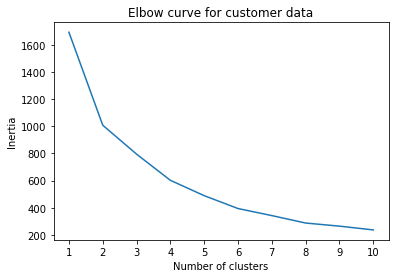

In [128]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

In [ ]:
# Initialize the k-means model. 
# Use K number = 4, elbow of the curve.
model = KMeans(n_clusters=4, random_state=0)
model.fit(transformed_features)

In [145]:
# Predict clusters
predictions = model.predict(transformed_features)
predictions

array([2, 2, 0, 3, 3, 4, 1, 3, 3, 3, 1, 3, 0, 1, 4, 0, 1, 4, 2, 2, 3, 0,
       3, 4, 4, 2, 3, 3, 4, 2, 4, 2, 4, 1, 2, 0, 3, 3, 4, 4, 4, 4, 1, 2,
       4, 3, 4, 4, 4, 2, 1, 0, 1, 3, 4, 4, 4, 0, 4, 3, 2, 4, 0, 2, 0, 4,
       3, 4, 0, 0, 2, 2, 2, 4, 4, 4, 1, 1, 3, 1, 3, 1, 1, 3, 3, 3, 1, 2,
       2, 4, 2, 3, 4, 1, 1, 3, 0, 2, 0, 3, 3, 1, 4, 0, 0, 4, 2, 4, 0, 4,
       2, 4, 2, 0, 4, 3, 1, 3, 3, 4, 2, 4, 3, 4, 3, 4, 1, 3, 1, 3, 3, 0,
       1, 1, 4, 4, 2, 3, 0, 3, 0, 0, 1, 3, 0, 4, 3, 0, 1, 4, 0, 3, 0, 2,
       2, 1, 3, 4, 3, 1, 2, 0, 2, 1, 4, 1, 1, 0, 0, 0, 1, 4, 1, 2, 2, 2,
       1, 1, 1, 3, 1, 2, 3, 0, 3, 1, 2, 3, 2, 4, 2, 3, 2, 4, 0, 1, 2, 1,
       3, 1, 1, 0, 1, 0, 3, 3, 3, 1, 4, 1, 0, 1, 1, 2, 2, 1, 1, 1, 0, 2,
       1, 2, 2, 1, 3, 2, 2, 2, 2, 1, 0, 4, 3, 3, 2, 0, 1, 2, 1, 2, 3, 2,
       2, 4, 1, 1, 3, 2, 4, 3, 2, 3, 1, 0, 1, 4, 1, 1, 3, 1, 1, 2, 2, 2,
       1, 1, 4, 2, 3, 1, 2, 0, 1, 4, 1, 3, 0, 3, 3, 3, 3, 0, 1, 0, 0, 4,
       0, 4, 1, 1, 2, 3, 0, 3, 0, 3, 1, 1, 0, 3, 1,

In [149]:
# Show df with lables for class
crypto_df['class'] = model.labels_
crypto_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,class
,,,,,
42,Scrypt,PoW/PoS,4.199995e+01,42,2
404,Scrypt,PoW/PoS,1.055185e+09,532000000,2
1337,X13,PoW/PoS,2.927942e+10,314159265359,0
BTC,SHA-256,PoW,1.792718e+07,21000000,3
ETH,Ethash,PoW,1.076842e+08,0,3


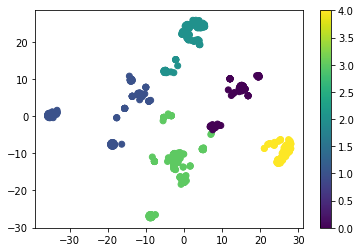

In [150]:
# Plot TSNE Reduced Dimensions & colorcode them with the labels
plt.scatter(transformed_features[:, 0], transformed_features[:,1], c = model.labels_ )
plt.colorbar()
plt.show()

In [ ]:
The dataset shows a pretty even scattered blobed set.  